## Exercises (Koh Yu Bin)
1. Find the range of values for each of the following data types:
    * `uint8`
    * `int8`
    * `uint32`
    * `int32`
2. Try to write a simple custom function to determine whether a given integer is odd or even number.
3. Write a simple example code to show that Numpy is more efficient in numerical computation of large arrays of data than equivalent Python list.
4. Run the following codes:
```python
    # create a 1D array
    my_arr = np.arange(10)
    print("Initial my_arr: ", my_arr)
    arr_slice = my_arr
    print("Initial arr_slice: ", arr_slice)

    # change the first element of arr_slice
    arr_slice[0] = 55

    print("my_arr: ", my_arr)
    print("arr_slice: ", arr_slice)
```

What do you notice? Propose a way to reassign `arr_slice` with new value **without modifying** `my_arr`.

5. Create an image as shown as the following with the help of Numpy and matplotlib modules. You can arbitrarily set the dimension of the image and white circular spot at the middle.

![image.png](attachment:5d4026b2-6b16-4515-8e03-3065096fa0e8.png)

In [1]:
#1
import numpy as np

data_types = {
    "uint8": np.iinfo(np.uint8),
    "int8": np.iinfo(np.int8),
    "uint32": np.iinfo(np.uint32),
    "int32": np.iinfo(np.int32)
}

ranges = {dtype: (info.min, info.max) for dtype, info in data_types.items()}
ranges


{'uint8': (0, 255),
 'int8': (-128, 127),
 'uint32': (0, 4294967295),
 'int32': (-2147483648, 2147483647)}

In [2]:
#2
def is_odd_or_even(number):
    """
    Determines whether a given integer is odd or even.
    
    Args:
    number : The integer to check.
    
    Returns:
    str: "Odd" if the number is odd, "Even" if the number is even.
    """
    try:
        num = int(number)
        return "Odd" if num % 2 != 0 else "Even"
    except ValueError:
        return "Error: The input must be an integer."
    except TypeError:
        return "Error: Invalid input type."

In [3]:
#3
import time

# Define a large size for comparison
size = 10**6

# Create large arrays
np_array = np.arange(size)
py_list = list(range(size))

# Timing Numpy array operation (e.g., element-wise square)
start_time_np = time.time()
np_result = np_array ** 2
time_np = time.time() - start_time_np

# Timing Python list operation (e.g., element-wise square)
start_time_py = time.time()
py_result = [x ** 2 for x in py_list]
time_py = time.time() - start_time_py

time_np, time_py

(0.0019931793212890625, 0.06290030479431152)

In [8]:
#4
# Initial array creation
my_arr = np.arange(10)
print("Initial my_arr: ", my_arr)

# Creating a slice as a copy of the array
arr_slice = my_arr.copy()
print("Initial arr_slice: ", arr_slice)

# Modifying the slice
arr_slice[0] = 55

# Printing the arrays after modification
print("my_arr: ", my_arr)
print("arr_slice: ", arr_slice)

Initial my_arr:  [0 1 2 3 4 5 6 7 8 9]
Initial arr_slice:  [0 1 2 3 4 5 6 7 8 9]
my_arr:  [0 1 2 3 4 5 6 7 8 9]
arr_slice:  [55  1  2  3  4  5  6  7  8  9]


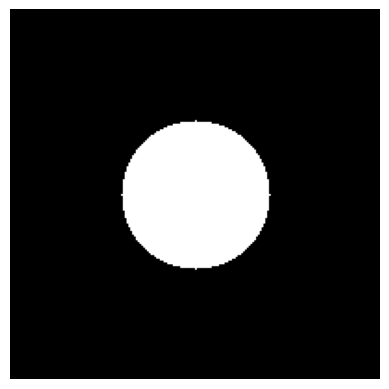

In [11]:
#5
import matplotlib.pyplot as plt

# Define the dimensions of the image
image_size = 200  # The image will be 200x200 pixels
radius = 40       # The radius of the white circle

# Create a black square image
image = np.zeros((image_size, image_size))

# Calculate the center of the image
center_x, center_y = image_size // 2, image_size // 2

# Create a grid of coordinates
y, x = np.ogrid[:image_size, :image_size]

# Create the mask for the circle
mask = (x - center_x)**2 + (y - center_y)**2 <= radius**2

# Apply the mask to create a white circle in the middle
image[mask] = 1  # Set the pixels within the circle to 1 

# Plot the image
plt.imshow(image, cmap='gray')
plt.axis('off')  
plt.show()